In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
#path = ('/content/drive/My Drive/Capstone/Final_invoice.csv')
#final_invoice = pd.read_csv(path)

In [6]:
#path = ('/content/drive/My Drive/Capstone/JTD.csv')
#jtd = pd.read_csv(path)

In [7]:
#path = ('/content/drive/My Drive/Capstone/Customer_Data.xlsx')
#customer_full_data = pd.read_excel(path)

In [8]:
#path = ('/content/drive/My Drive/Capstone/Plant Master.xlsx')
#plant_full_data = pd.read_excel(path)

In [174]:
jtd=pd.read_csv("A:\\GreyAtom\\CAPSTONE PROJECT\\JTD.csv")
customer_full_data=pd.read_excel("A:\\GreyAtom\\CAPSTONE PROJECT\\Customer_Data.xlsx")
final_invoice=pd.read_csv("A:\\GreyAtom\\CAPSTONE PROJECT\\Final_invoice.csv")
plant_full_data=pd.read_excel("A:\\GreyAtom\\CAPSTONE PROJECT\\Plant Master.xlsx")

In [10]:
# Define Utiliy Functions
def data_insights_report(data=pd.DataFrame()):
    report = pd.DataFrame()
    report['Columns'] = data.columns
    report['Data_Types'] = data.dtypes.values
    report['Unique_Count'] = data.nunique().values
    report['NAN_Count'] = data.isna().sum().values

    tempdf = data.describe().apply(lambda x: round(x,2), axis=1).T
    pd.merge(report,tempdf.reset_index().rename(columns={'index':'Columns'}), on='Columns')

    return report.join(tempdf, on='Columns')

## EDA ON FINAL INVOICE




In [11]:
data_insights_report(final_invoice)

Columns Data_Types  Unique_Count  NAN_Count         count  \
0             Unnamed: 0      int64        492314          0 492314.000000   
1   Amt Rcvd From Custom    float64             1     197286 295028.000000   
2   Amt Rcvd From Ins Co    float64             1     197286 295028.000000   
3        Area / Locality     object         65509      23890           nan   
4              CGST(14%)    float64             1     197286 295028.000000   
5             CGST(2.5%)    float64             1     197286 295028.000000   
6               CGST(6%)    float64             1     197286 295028.000000   
7               CGST(9%)    float64             1     197286 295028.000000   
8                   CITY     object         19580          1           nan   
9    Cash /Cashless Type     object             3     464894           nan   
10             Claim No.     object          3909     487510           nan   
11             Cust Type     object             7          0           nan   
12          Customer No.     object        253484          0           nan   
13              District     object            36          0           nan   
14           Expiry Date     object          1133     470083           nan   
15        Gate Pass Date     object           423     451399           nan   
16        Gate Pass Time     object         23874          0           nan   
17             IGST(12%)    float64             1     197286 295028.000000   
18             IGST(18%)    float64             1     197286 295028.000000   
19             IGST(28%)    float64             1     197286 295028.000000   
20              IGST(5%)    float64             1     197286 295028.000000   
21     Insurance Company     object            21     468723           nan   
22          Invoice Date     object          1642          0           nan   
23            Invoice No      int64        492314          0 492314.000000   
24          Invoice Time     object         46697          0           nan   
25           Job Card No      int64        489329          0 492314.000000   
26          JobCard Date     object          1643          0           nan   
27          JobCard Time     object         42971          0           nan   
28           KMs Reading      int64        159473          0 492314.000000   
29          Labour Total    float64        137154          0 492314.000000   
30                  Make     object            28          0           nan   
31            Misc Total    float64         17728          0 492314.000000   
32                 Model     object           245       1525           nan   
33               ODN No.    float64        295028     197286 295028.000000   
34             OSL Total    float64         29419          0 492314.000000   
35            Order Type     object             9          0           nan   
36       Outstanding Amt    float64             1     197286 295028.000000   
37           Parts Total    float64        212765          0 492314.000000   
38              Pin code      int64         11810          0 492314.000000   
39                 Plant     object           242          0           nan   
40           Plant Name1     object           244          0           nan   
41            Policy no.     object         10587     475432           nan   
42          Print Status     object             2          0           nan   
43          Recovrbl Exp    float64           192          0 492314.000000   
44               Regn No     object        260324         16           nan   
45        SGST/UGST(14%)    float64             1     197286 295028.000000   
46       SGST/UGST(2.5%)    float64             1     197286 295028.000000   
47         SGST/UGST(6%)    float64             1     197286 295028.000000   
48         SGST/UGST(9%)    float64             1     197286 295028.000000   
49  Service Advisor Name    float64             0     492314      0.000000   
50            TDS amount    float64    

In [100]:
final_invoice.shape

(492314, 59)

In [13]:
final_invoice['Cust Type'].unique()

array(['Retail', 'Corporate others', 'Corporate- M&M', 'Fleets', 'MFCWL',
       'Insurance', 'Franchise'], dtype=object)

In [14]:
#percentage of null values
temp_df = final_invoice.isnull().sum().reset_index()
temp_df['Percentage'] = (temp_df[0]/len(final_invoice))*100
temp_df.columns = ['Column Name', 'Number of null values', 'Null values in percentage']
print(f"The length of dataset is \t {len(final_invoice)}")
temp_df

The length of dataset is 	 492314


Column Name  Number of null values  Null values in percentage
0             Unnamed: 0                      0                   0.000000
1   Amt Rcvd From Custom                 197286                  40.073205
2   Amt Rcvd From Ins Co                 197286                  40.073205
3        Area / Locality                  23890                   4.852594
4              CGST(14%)                 197286                  40.073205
5             CGST(2.5%)                 197286                  40.073205
6               CGST(6%)                 197286                  40.073205
7               CGST(9%)                 197286                  40.073205
8                   CITY                      1                   0.000203
9    Cash /Cashless Type                 464894                  94.430384
10             Claim No.                 487510                  99.024200
11             Cust Type                      0                   0.000000
12          Customer No.                      0                   0.000000
13              District                      0                   0.000000
14           Expiry Date                 470083                  95.484386
15        Gate Pass Date                 451399                  91.689247
16        Gate Pass Time                      0                   0.000000
17             IGST(12%)                 197286                  40.073205
18             IGST(18%)                 197286                  40.073205
19             IGST(28%)                 197286                  40.073205
20              IGST(5%)                 197286                  40.073205
21     Insurance Company                 468723                  95.208140
22          Invoice Date                      0                   0.000000
23            Invoice No                      0                   0.000000
24          Invoice Time                      0                   0.000000
25           Job Card No                      0                   0.000000
26          JobCard Date                      0                   0.000000
27          JobCard Time                      0                   0.000000
28           KMs Reading                      0                   0.000000
29          Labour Total                      0                   0.000000
30                  Make                      0                   0.000000
31            Misc Total                      0                   0.000000
32                 Model                   1525                   0.309762
33               ODN No.                 197286                  40.073205
34             OSL Total                      0                   0.000000
35            Order Type                      0                   0.000000
36       Outstanding Amt                 197286                  40.073205
37           Parts Total                      0                   0.000000
38              Pin code                      0                   0.000000
39                 Plant                      0                   0.000000
40           Plant Name1                      0                   0.000000
41            Policy no.                 475432                  96.570888
42          Print Status                      0                   0.000000
43          Recovrbl Exp                      0                   0.000000
44               Regn No                     16                   0.003250
45        SGST/UGST(14%)                 197286                  40.073205
46       SGST/UGST(2.5%)                 197286                  40.073205
47         SGST/UGST(6%)                 197286                  40.073205
48         SGST/UGST(9%)                 197286                  40.073205
49  Service Advisor Name                 492314                 100.000000
50            TDS amount                 197286                  40.073205
51       Technician Name                 236834                  48.106290
52    Total Amt Wtd Tax.              

In [15]:
final_invoice.District.value_counts(normalize=True)*100

Maharashtra            26.023838
Tamil Nadu             23.624963
Karnataka               8.964807
Andhra Pradesh          8.247582
Uttar Pradesh           6.405262
Gujarat                 4.956796
Punjab                  4.619206
Haryana                 3.650313
Madhya Pradesh          2.762058
Rajasthan               2.735246
Telangana               1.572370
Kerala                  1.219141
Delhi                   1.099705
Chandigarh              0.674163
Himachal Pradesh        0.673554
Bihar                   0.661773
Uttarakhand             0.516134
Odisha                  0.468197
Puducherry              0.348558
West Bengal             0.270559
Dadra and Nagar Hav.    0.184232
Chhattisgarh            0.126342
Daman and Diu           0.088561
Jharkhand               0.051999
Assam                   0.020312
Arunachal Pradesh       0.012594
Nagaland                0.004875
Goa                     0.004875
Jammu and Kashmir       0.004266
Andaman and Nico.In.    0.001625
Lakshadwee

In [16]:
final_invoice[final_invoice['Customer No.']=='67849']

Unnamed: 0  Amt Rcvd From Custom  Amt Rcvd From Ins Co  \
0                0              0.000000              0.000000   
184701      619842              0.000000              0.000000   
184829      619970              0.000000              0.000000   
197821      632962              0.000000              0.000000   
220230      655371              0.000000              0.000000   

       Area / Locality  CGST(14%)  CGST(2.5%)  CGST(6%)  CGST(9%)   CITY  \
0             MAJIWADA   0.000000    0.000000  0.000000  0.000000  Thane   
184701        MAJIWADA   0.000000    0.000000  0.000000  0.000000  Thane   
184829        MAJIWADA   0.000000    0.000000  0.000000  0.000000  Thane   
197821        MAJIWADA   0.000000    0.000000  0.000000  0.000000  Thane   
220230        MAJIWADA   0.000000    0.000000  0.000000  0.000000  Thane   

       Cash /Cashless Type    Claim No. Cust Type Customer No.     District  \
0                      NaN          NaN    Retail        67849  Maharashtra   
184701            CASHLESS  MOT03977311    Retail        67849  Maharashtra   
184829                 NaN          NaN    Retail        67849  Maharashtra   
197821                 NaN          NaN    Retail        67849  Maharashtra   
220230            CASHLESS  MOTO4249094    Retail        67849  Maharashtra   

       Expiry Date Gate Pass Date Gate Pass Time  IGST(12%)  IGST(18%)  \
0              NaN            NaN       00:00:00   0.000000   0.000000   
184701         NaN            NaN       00:00:00   0.000000   0.000000   
184829         NaN            NaN       00:00:00   0.000000   0.000000   
197821         NaN            NaN       00:00:00   0.000000   0.000000   
220230         NaN            NaN       00:00:00   0.000000   0.000000   

        IGST(28%)  IGST(5%) Insurance Company Invoice Date  Invoice No  \
0        0.000000  0.000000               NaN   2015-01-02  7005200002   
184701   0.000000  0.000000               NaN   2014-08-14  7000137359   
184829   0.000000  0.000000               NaN   2014-08-16  7000137489   
197821   0.000000  0.000000               NaN   2014-10-09  7000151113   
220230   0.000000  0.000000               NaN   2014-12-31  7000175211   

       Invoice Time  Job Card No JobCard Date JobCard Time  KMs Reading  \
0          11:30:36       168303   2014-12-13     14:29:43        49317   
184701     17:54:30       136482   2014-08-08     15:26:53        45575   
184829     10:52:30       135895   2014-08-06     12:49:48        45575   
197821     17:35:30       150383   2014-10-06     11:40:52        47556   
220230     18:41:00       168210   2014-12-13     12:14:37        49317   

        Labour Total            Make  Misc Total  Model           ODN No.  \
0        1203.140000  GENERAL MOTORS    0.000000  SPARK 7005200002.000000   
184701    989.980000  GENERAL MOTORS    0.000000  SPARK 7000137359.000000   
184829   6473.050000  GENERAL MOTORS    0.000000  SPARK 7000137489.000000   
197821      0.000000  GENERAL MOTORS    0.000000  SPARK 7000151113.000000   
220230   1760.020000  GENERAL MOTORS  500.000000  SPARK 7000175211.000000   

         OSL Total       Order Type  Outstanding Amt  Parts Total  Pin code  \
0       500.060000     Paid Service         0.000000  2348.750000    400601   
184701 6249.870000       Accidental         0.000000  4230.250000    400601   
184829 7325.090000     Paid Service         0.000000 14546.140000    400601   
197821    0.000000  Running Repairs         0.000000   200.000000    400601   
220230 7850.090000       Accidental         0.000000 20348.810000    400601   

       Plant Plant Name1 Policy no. Print Status  Recovrbl Exp     Regn No  \
0       BC01       THANE        NaN           NO      0.000000  KA19MA1291   
184701  BC01       THANE        NaN           NO      0.000000  KA19MA1291   
184829  BC01       THANE        NaN           NO      0.000000  KA19MA1291   
197821  BC01       THANE        NaN           NO      0.000000  KA19MA1291   
220230  BC

In [175]:
#All columns in final_invoice having more than 30k null values
columns_to_be_removed = final_invoice.isnull().sum()[final_invoice.isnull().sum().sort_values() >30000].index
columns_to_be_removed 

Index(['Amt Rcvd From Custom', 'Amt Rcvd From Ins Co', 'CGST(14%)',
       'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)', 'Cash /Cashless Type',
       'Claim No.', 'Expiry Date', 'Gate Pass Date', 'IGST(12%)', 'IGST(18%)',
       'IGST(28%)', 'IGST(5%)', 'Insurance Company', 'ODN No.',
       'Outstanding Amt', 'Policy no.', 'SGST/UGST(14%)', 'SGST/UGST(2.5%)',
       'SGST/UGST(6%)', 'SGST/UGST(9%)', 'Service Advisor Name', 'TDS amount',
       'Technician Name', 'Total CGST', 'Total GST', 'Total IGST',
       'Total SGST/UGST', 'Total Value'],
      dtype='object')

In [176]:
#Removing the columns 
invoice = final_invoice.drop(columns=columns_to_be_removed)

In [177]:
invoice.shape

(492314, 29)

In [123]:
invoice.head()

Unnamed: 0 Area / Locality      CITY Cust Type Customer No.     District  \
0           0        MAJIWADA     Thane    Retail        67849  Maharashtra   
1           1           THNAE     THNAE    Retail        84419  Maharashtra   
2           2           THANE  THANE[W]    Retail        81055  Maharashtra   
3           3           THNAE     THNAE    Retail        84419  Maharashtra   
4           4           THANE     THANE    Retail        18980  Maharashtra   

  Gate Pass Time Invoice Date  Invoice No Invoice Time  Job Card No  \
0       00:00:00   2015-01-02  7005200002     11:30:36       168303   
1       00:00:00   2015-01-03  7005200003     10:07:32       173997   
2       00:00:00   2015-01-03  7005200004     11:12:57       173889   
3       00:00:00   2015-01-03  7005200005     11:40:44       174158   
4       00:00:00   2015-01-03  7005200006     12:07:17       173860   

  JobCard Date JobCard Time  KMs Reading  Labour Total            Make  \
0   2014-12-13     14:29:43        49317   1203.140000  GENERAL MOTORS   
1   2015-01-02     14:12:18        78584    804.260000     TATA MOTORS   
2   2015-01-02     11:40:44        33985    180.190000   MARUTI SUZUKI   
3   2015-01-03     10:12:32        78584      0.000000     TATA MOTORS   
4   2015-01-02     10:45:42        50057   1202.970000         HYUNDAI   

   Misc Total        Model  OSL Total         Order Type  Parts Total  \
0    0.000000        SPARK 500.060000       Paid Service  2348.750000   
1  197.030000       INDICA   0.000000  SMC Value Package     0.000000   
2    0.000000          ZEN   0.000000    Running Repairs    52.950000   
3    0.000000       INDICA   0.000000     SMC Redemption     0.000000   
4  100.000000  SANTRO XING 499.990000       Paid Service   944.160000   

   Pin code Plant Plant Name1 Print Status  Recovrbl Exp     Regn No  \
0    400601  BC01       THANE           NO      0.000000  KA19MA1291   
1    400603  BC01       THANE           NO      0.000000   MH43R3046   
2    400607  BC01       THANE           NO      0.000000  AP09AX0582   
3    400603  BC01       THANE           NO      0.000000   MH43R3046   
4    400603  BC01       THANE           NO      0.000000  MH04CD9768   

   Total Amt Wtd Tax.  User ID  
0         4051.950000  BC01FS1  
1         1001.290000  BC01SA2  
2          233.140000  BC01SA2  
3            0.000000  BC01SA2  
4         2747.120000  BC01SA2

In [178]:
# Irrelevant columns removed
columns_irrelevant = ['Area / Locality', 'Print Status', 'Gate Pass Time', 'Recovrbl Exp','CITY','Invoice No','Misc Total','OSL Total','Parts Total','Pin code','Plant Name1','Regn No','User ID']
invoice = invoice.drop(columns=columns_irrelevant)

In [179]:
invoice.head()

Unnamed: 0 Cust Type Customer No.     District Invoice Date Invoice Time  \
0           0    Retail        67849  Maharashtra   2015-01-02     11:30:36   
1           1    Retail        84419  Maharashtra   2015-01-03     10:07:32   
2           2    Retail        81055  Maharashtra   2015-01-03     11:12:57   
3           3    Retail        84419  Maharashtra   2015-01-03     11:40:44   
4           4    Retail        18980  Maharashtra   2015-01-03     12:07:17   

   Job Card No JobCard Date JobCard Time  KMs Reading  Labour Total  \
0       168303   2014-12-13     14:29:43        49317   1203.140000   
1       173997   2015-01-02     14:12:18        78584    804.260000   
2       173889   2015-01-02     11:40:44        33985    180.190000   
3       174158   2015-01-03     10:12:32        78584      0.000000   
4       173860   2015-01-02     10:45:42        50057   1202.970000   

             Make        Model         Order Type Plant  Total Amt Wtd Tax.  
0  GENERAL MOTORS        SPARK       Paid Service  BC01         4051.950000  
1     TATA MOTORS       INDICA  SMC Value Package  BC01         1001.290000  
2   MARUTI SUZUKI          ZEN    Running Repairs  BC01          233.140000  
3     TATA MOTORS       INDICA     SMC Redemption  BC01            0.000000  
4         HYUNDAI  SANTRO XING       Paid Service  BC01         2747.120000

In [126]:
invoice['Model'].value_counts()

SWIFT                     31899
ALTO                      28569
SANTRO                    24536
SCORPIO CRDE              23771
WAGONR                    22864
I10                       21892
INDICA                    19810
SWIFT DZIRE               16004
BOLERO                    15909
XYLO                      13346
I20                       12896
INNOVA                    11470
CITY                      10665
VISTA                     10341
INDIGO                    10337
800                       10185
VERNA                      8564
FIGO                       7709
FIESTA                     7667
LOGAN D                    7353
SPARK                      7270
RITZ                       7075
BEAT                       6881
OMNI                       6415
ACCENT                     5734
VERITO                     5573
ZEN                        5137
LOGAN P                    5063
INDIGO MANZA               4990
XUV 500                    4748
SCORPIO NEF                4641
TAVERA  

In [127]:
invoice['Order Type'].value_counts()

Running Repairs      269455
Paid Service         135004
Accidental            44159
SMC Redemption        15738
Mechanical            15100
SMC Value Package      9781
Repeat Order           3043
WBW Order                17
Workshop Damage          17
Name: Order Type, dtype: int64

In [25]:
a=invoice.groupby(['Make','Order Type'])['Order Type'].count()
a

Make                  Order Type       
AUDI                  Accidental              56
                      Mechanical               8
                      Paid Service            31
                      Running Repairs        125
BMW                   Accidental              65
                      Mechanical               4
                      Paid Service            28
                      Running Repairs        160
DAEWOO                Accidental              14
                      Mechanical              13
                      Paid Service           109
                      Repeat Order             4
                      Running Repairs        246
                      SMC Redemption           4
                      SMC Value Package        2
FIAT                  Accidental             630
                      Mechanical             194
                      Paid Service          1623
                      Repeat Order            68
                      Running

In [26]:
#Maximum type of orders w.r.t the Make of the top 5 car
a.nlargest(5)

Make                  Order Type     
MARUTI SUZUKI         Running Repairs    79972
MAHINDRA &  MAHINDRA  Running Repairs    47922
HYUNDAI               Running Repairs    44083
MARUTI SUZUKI         Paid Service       41446
TATA MOTORS           Running Repairs    34031
Name: Order Type, dtype: int64

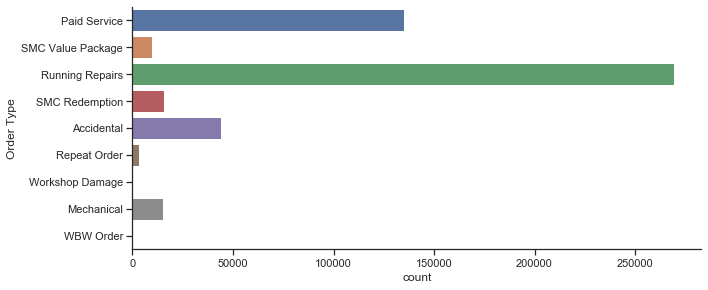

In [27]:
# Distribution based on Order Type
g = sns.catplot(y="Order Type",
                data=invoice,kind="count",height=4, aspect=2.5);

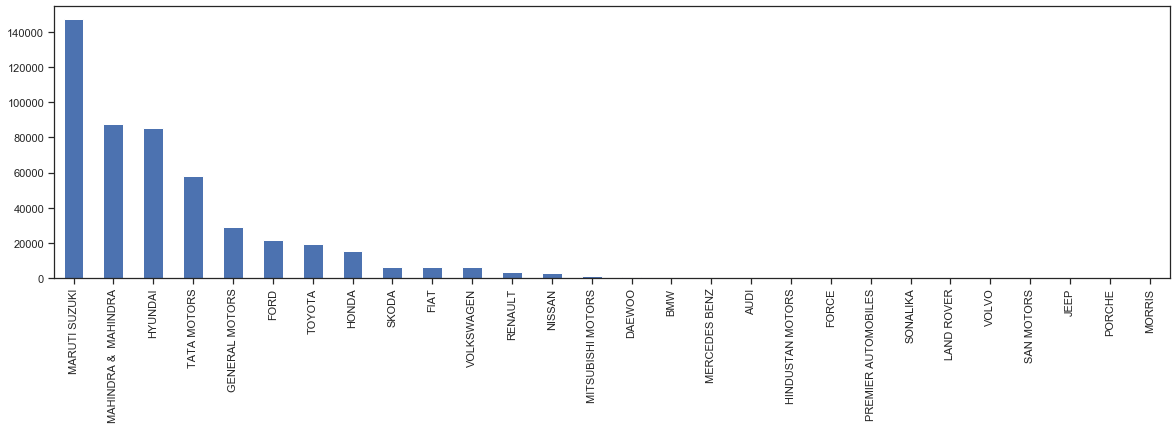

In [61]:
plt.figure(figsize=(20,5))
invoice.Make.value_counts().head(100).plot.bar()
plt.show()

In [28]:
# Total labour charges of a certain model of a car w.r.t the type of order
invoice.groupby(['Make','Model','Order Type'])['Labour Total'].sum().apply(lambda x: '%.3f' % x)

Make                  Model                   Order Type       
AUDI                  A4                      Accidental             135286.410
                                              Mechanical               7799.220
                                              Paid Service             7713.130
                                              Running Repairs         57687.290
                      A6                      Accidental             204128.010
                                              Mechanical                  0.000
                                              Paid Service             7281.900
                                              Running Repairs          6629.400
                      A7                      Paid Service              550.020
                                              Running Repairs           500.000
                      A8                      Paid Service             3041.420
                                              Running Re

Maximum labour charges were for Accidental Orders for AUDI.

In [29]:
# Average labour charge for a certain Car Make
b=invoice.groupby(['Make'])['Labour Total'].mean()
b

Make
AUDI                   4079.235455
BMW                    2762.297198
DAEWOO                 1278.075459
FIAT                   1341.081429
FORCE                  1675.352319
FORD                   1364.282178
GENERAL MOTORS         1533.905140
HINDUSTAN MOTORS       1824.132557
HONDA                  1422.861181
HYUNDAI                1158.095608
JEEP                     61.775714
LAND ROVER             3204.673333
MAHINDRA &  MAHINDRA   1761.421790
MARUTI SUZUKI          1100.512993
MERCEDES BENZ          3401.730898
MITSUBISHI MOTORS      1966.983399
MORRIS                  329.320000
NISSAN                 1583.425913
PORCHE                 2851.778333
PREMIER AUTOMOBILES    1609.602473
RENAULT                1425.337562
SAN MOTORS              505.690000
SKODA                  1675.766140
SONALIKA               5029.399540
TATA MOTORS            1347.441713
TOYOTA                 1611.993212
VOLKSWAGEN             1551.993764
VOLVO                  2627.293158
Name: Labour To

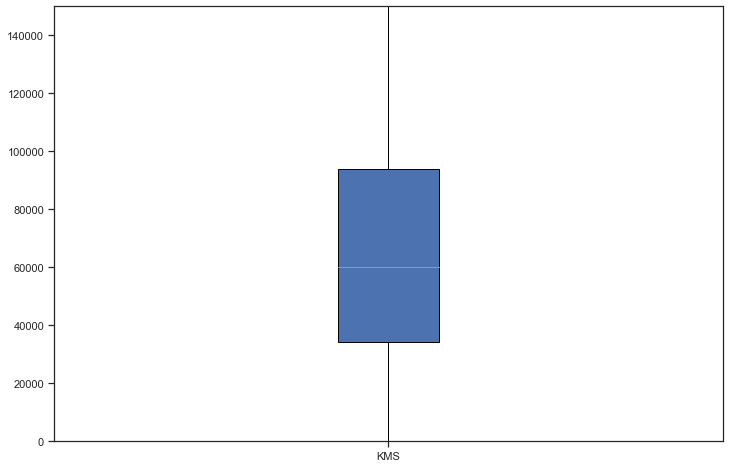

In [70]:
top =150000
bottom = 0
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_ylim(bottom, top)
ax1.boxplot(invoice['KMs Reading'],patch_artist=True,labels=['KMS'])
plt.show()

The average KM's reading for the cars were around 60,000 Kms.

In [180]:
#Imputing the null values of Model and CITY column with mode
invoice['Model']  = invoice['Model'].fillna(invoice['Model'].mode()[0])

In [131]:
invoice.isnull().sum().sort_values()

Unnamed: 0            0
Cust Type             0
Customer No.          0
District              0
Invoice Date          0
Invoice Time          0
JobCard Date          0
JobCard Time          0
KMs Reading           0
Labour Total          0
Make                  0
Model                 0
Order Type            0
Plant                 0
Total Amt Wtd Tax.    0
dtype: int64

In [132]:
invoice['Customer No.'].value_counts()

E4981       2668
E11206       688
412          610
14505        441
MFCWP01      360
221957       333
E1205        324
MFCCM03      251
MFM15        157
148721       145
MFCCM14      143
MFCC018      136
MFCC036      126
E11111       116
E11365       111
56475        105
MFCC021      104
E11328       103
E2003         99
EMA503        78
455           75
37348         71
E11208        68
45869         65
20            64
38678         62
244086        58
E11262        55
10893         55
E15089        53
52467         53
75256         51
58803         50
77247         50
49992         46
E11202        46
1376          45
751           45
111693        44
127513        44
78388         44
E11946        43
1124          42
E16200        42
17            41
MFCC030       40
75944         40
36242         40
E1208         39
37974         39
E25995        39
174547        38
74073         38
E2591         37
31858         37
115095        37
74805         36
MFCCM01       35
82793         

In [182]:
invoice.columns

Index(['Unnamed: 0', 'Cust Type', 'Customer No.', 'District', 'Invoice Date',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Model', 'Order Type', 'Plant',
       'Total Amt Wtd Tax.'],
      dtype='object')

Deriving invoice date time , job card date time & service time

In [183]:
invoice['JobCard Date'] = pd.to_datetime(invoice['JobCard Date'],dayfirst=True)
invoice['Invoice Date'] = pd.to_datetime(invoice['Invoice Date'],dayfirst=True)
invoice["Service_Time"]=invoice["Invoice Date"]-invoice["JobCard Date"]

In [184]:
invoice.drop(['JobCard Date','JobCard Time','Invoice Date','Invoice Time'],axis = 1,inplace=True)

In [185]:
invoice.head()

Unnamed: 0 Cust Type Customer No.     District  Job Card No  KMs Reading  \
0           0    Retail        67849  Maharashtra       168303        49317   
1           1    Retail        84419  Maharashtra       173997        78584   
2           2    Retail        81055  Maharashtra       173889        33985   
3           3    Retail        84419  Maharashtra       174158        78584   
4           4    Retail        18980  Maharashtra       173860        50057   

   Labour Total            Make        Model         Order Type Plant  \
0   1203.140000  GENERAL MOTORS        SPARK       Paid Service  BC01   
1    804.260000     TATA MOTORS       INDICA  SMC Value Package  BC01   
2    180.190000   MARUTI SUZUKI          ZEN    Running Repairs  BC01   
3      0.000000     TATA MOTORS       INDICA     SMC Redemption  BC01   
4   1202.970000         HYUNDAI  SANTRO XING       Paid Service  BC01   

   Total Amt Wtd Tax. Service_Time  
0         4051.950000      20 days  
1         1001.290000       1 days  
2          233.140000       1 days  
3            0.000000       0 days  
4         2747.120000       1 days

In [186]:
invoice['ServiceTime_category']=None
invoice.loc[invoice['Service_Time']<pd.Timedelta(hours=24),'ServiceTime_category']='Fast'
invoice.loc[(invoice['Service_Time']>=pd.Timedelta(hours=24))&(invoice['Service_Time']<pd.Timedelta(hours=48)),'ServiceTime_category']='Mid'
invoice.loc[(invoice['Service_Time']>=pd.Timedelta(hours=48))&(invoice['Service_Time']<pd.Timedelta(hours=96)),'ServiceTime_category']='Slow'
invoice.loc[invoice['Service_Time']>=pd.Timedelta(hours=96),'ServiceTime_category']='Very slow'

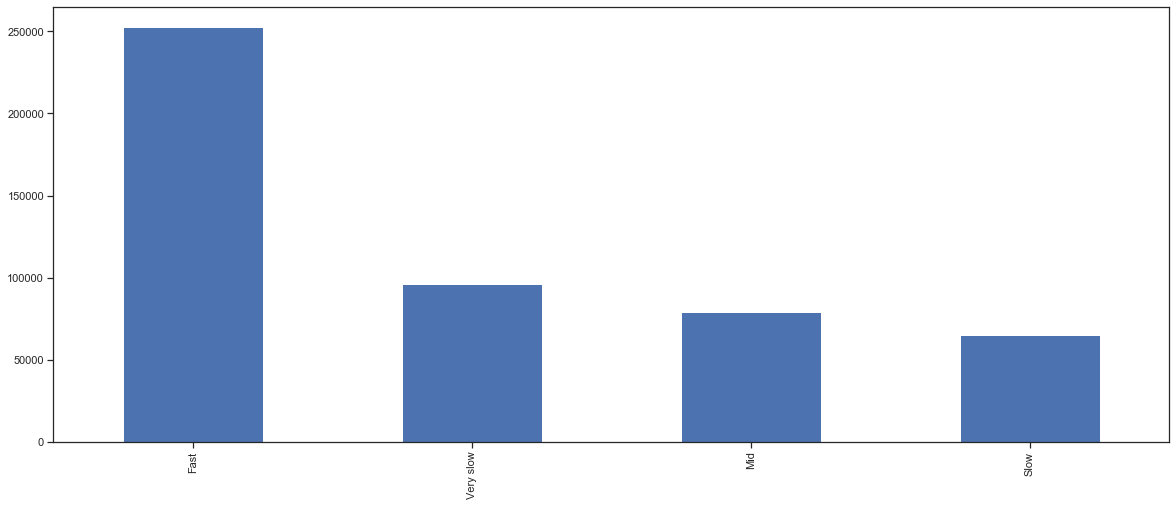

In [164]:
plt.figure(figsize=(20,8))
invoice.ServiceTime_category.value_counts().head(100).plot.bar()
plt.show()

In [154]:
invoice.head()

Unnamed: 0 Cust Type Customer No.     District  KMs Reading  Labour Total  \
0           0    Retail        67849  Maharashtra        49317   1203.140000   
1           1    Retail        84419  Maharashtra        78584    804.260000   
2           2    Retail        81055  Maharashtra        33985    180.190000   
3           3    Retail        84419  Maharashtra        78584      0.000000   
4           4    Retail        18980  Maharashtra        50057   1202.970000   

             Make        Model         Order Type Plant  Total Amt Wtd Tax.  \
0  GENERAL MOTORS        SPARK       Paid Service  BC01         4051.950000   
1     TATA MOTORS       INDICA  SMC Value Package  BC01         1001.290000   
2   MARUTI SUZUKI          ZEN    Running Repairs  BC01          233.140000   
3     TATA MOTORS       INDICA     SMC Redemption  BC01            0.000000   
4         HYUNDAI  SANTRO XING       Paid Service  BC01         2747.120000   

  Service_Time ServiceTime_category  
0      20 days            Very slow  
1       1 days                  Mid  
2       1 days                  Mid  
3       0 days                 Fast  
4       1 days                  Mid

In [71]:
# The total revenue generated in servicing a particular Make.
rev = pd.DataFrame(invoice.groupby(['Make'])['Total Amt Wtd Tax.'].sum()).reset_index()
rev.columns = ['make','total_revenue']
rev['percent'] = round(rev['total_revenue']/(rev['total_revenue'].sum())*100,4)
display (rev.sort_values(['total_revenue'], ascending=0))

make    total_revenue   percent
12  MAHINDRA &  MAHINDRA 572455038.739980 26.457400
13         MARUTI SUZUKI 472612848.709942 21.843000
9                HYUNDAI 314300953.879973 14.526200
24           TATA MOTORS 251313718.059988 11.615100
6         GENERAL MOTORS 130497477.380001  6.031300
25                TOYOTA 110018886.220000  5.084800
5                   FORD  97340243.840000  4.498800
8                  HONDA  68703508.830000  3.175300
22                 SKODA  39388722.340000  1.820400
3                   FIAT  30679191.160000  1.417900
26            VOLKSWAGEN  29582815.470000  1.367200
20               RENAULT  14775518.740000  0.682900
17                NISSAN  12955143.090000  0.598800
15     MITSUBISHI MOTORS   8733173.680000  0.403600
14         MERCEDES BENZ   2343509.210000  0.108300
0                   AUDI   2097776.010000  0.097000
1                    BMW   1940197.150000  0.089700
2                 DAEWOO   1227559.990000  0.056700
4                  FORCE    834771.230000  0.038600
7       HINDUSTAN MOTORS    681673.840000  0.031500
23              SONALIKA    518453.560000  0.024000
19   PREMIER AUTOMOBILES    398391.080000  0.018400
11            LAND ROVER    155110.210000  0.007200
27                 VOLVO     61355.700000  0.002800
10                  JEEP     38318.880000  0.001800
18                PORCHE     20773.050000  0.001000
21            SAN MOTORS      6160.170000  0.000300
16                MORRIS       837.560000  0.000000

MAHINDRA & MAHINDRA generate 26.5% of the total revenue earned by MFCS.

In [160]:
invoice.head()

Unnamed: 0 Cust Type Customer No.     District  KMs Reading  Labour Total  \
0           0    Retail        67849  Maharashtra        49317   1203.140000   
1           1    Retail        84419  Maharashtra        78584    804.260000   
2           2    Retail        81055  Maharashtra        33985    180.190000   
3           3    Retail        84419  Maharashtra        78584      0.000000   
4           4    Retail        18980  Maharashtra        50057   1202.970000   

             Make        Model         Order Type Plant  Total Amt Wtd Tax.  \
0  GENERAL MOTORS        SPARK       Paid Service  BC01         4051.950000   
1     TATA MOTORS       INDICA  SMC Value Package  BC01         1001.290000   
2   MARUTI SUZUKI          ZEN    Running Repairs  BC01          233.140000   
3     TATA MOTORS       INDICA     SMC Redemption  BC01            0.000000   
4         HYUNDAI  SANTRO XING       Paid Service  BC01         2747.120000   

  Service_Time ServiceTime_category  
0      20 days            Very slow  
1       1 days                  Mid  
2       1 days                  Mid  
3       0 days                 Fast  
4       1 days                  Mid

In [187]:
invoice.drop(['KMs Reading','Plant'],axis = 1,inplace=True)

In [188]:
invoice.head()

Unnamed: 0 Cust Type Customer No.     District  Job Card No  Labour Total  \
0           0    Retail        67849  Maharashtra       168303   1203.140000   
1           1    Retail        84419  Maharashtra       173997    804.260000   
2           2    Retail        81055  Maharashtra       173889    180.190000   
3           3    Retail        84419  Maharashtra       174158      0.000000   
4           4    Retail        18980  Maharashtra       173860   1202.970000   

             Make        Model         Order Type  Total Amt Wtd Tax.  \
0  GENERAL MOTORS        SPARK       Paid Service         4051.950000   
1     TATA MOTORS       INDICA  SMC Value Package         1001.290000   
2   MARUTI SUZUKI          ZEN    Running Repairs          233.140000   
3     TATA MOTORS       INDICA     SMC Redemption            0.000000   
4         HYUNDAI  SANTRO XING       Paid Service         2747.120000   

  Service_Time ServiceTime_category  
0      20 days            Very slow  
1       1 days                  Mid  
2       1 days                  Mid  
3       0 days                 Fast  
4       1 days                  Mid

In [206]:
aggregation_by_invoice = {'Cust Type' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Labour Total':'sum',                           
                              'Make' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Total Amt Wtd Tax.' : 'sum',
                              'Order Type' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'ServiceTime_category' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'District' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Service_Time' : 'sum'}

invoice_eda =invoice.groupby('Customer No.').agg(aggregation_by_invoice).reset_index()

In [207]:
invoice_eda.head()

Customer No. Cust Type  Labour Total            Make  Total Amt Wtd Tax.  \
0            1    Retail      0.000000   MARUTI SUZUKI            0.000000   
1           10    Retail   5658.420000  GENERAL MOTORS        11105.560000   
2          100    Retail   9749.070000           HONDA        20799.740000   
3         1000    Retail   5599.990000   MARUTI SUZUKI         8813.440000   
4        10000    Retail   1538.490000   MARUTI SUZUKI         1735.520000   

                                          Order Type ServiceTime_category  \
0                      Paid Service, Running Repairs            Very slow   
1                      Paid Service, Running Repairs      Fast, Slow, Mid   
2                           Paid Service, Accidental      Slow, Very slow   
3                      Paid Service, Running Repairs                 Fast   
4  SMC Redemption, SMC Value Package, Running Rep...            Fast, Mid   

         District Service_Time  
0     Maharashtra     273 days  
1     Maharashtra       3 days  
2     Maharashtra       6 days  
3     Maharashtra       0 days  
4  Andhra Pradesh       1 days

In [200]:
invoice_eda['Customer No.'].nunique()

253484

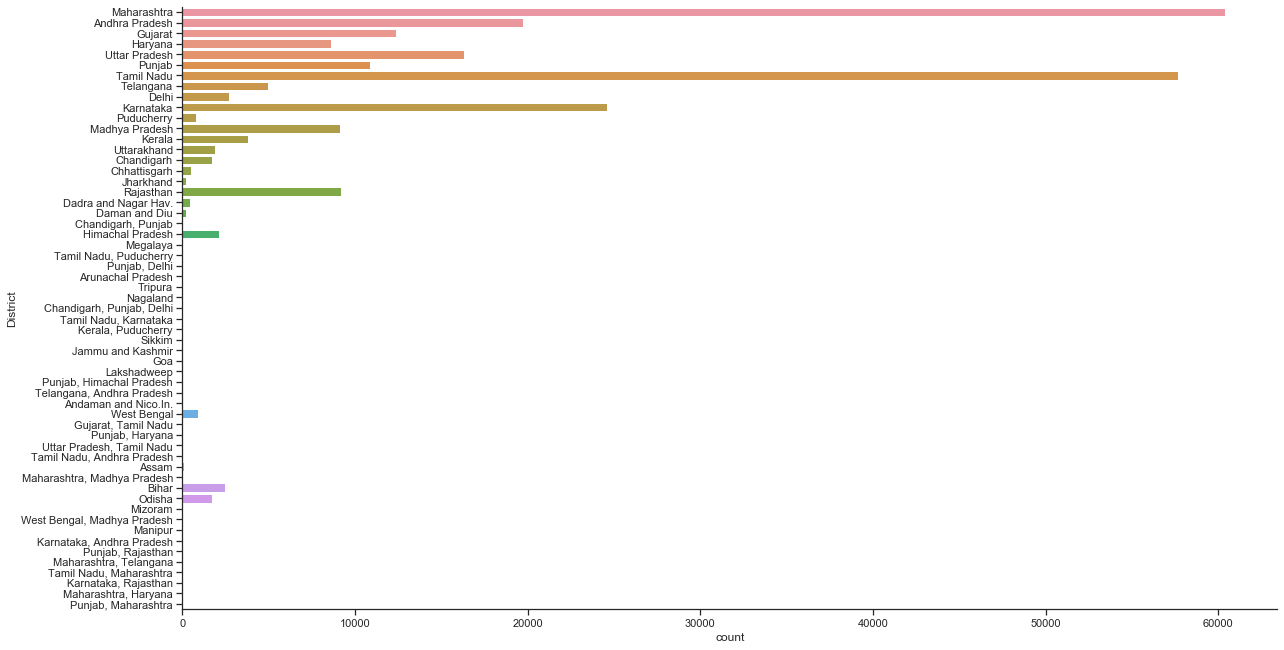

In [212]:
# State-wise Distribution 
d = sns.catplot(y="District",
                data=invoice_eda,kind="count",height=9, aspect=2);

In [214]:
invoice['Customer No.'].nunique()

253484

In [215]:
invoice['Job Card No'].nunique()

489329

## EDA ON PLANT

In [40]:
plant_full_data.head()

Plant                          Name 1 Valuation Area Customer no. - plant  \
0  BC07                      NERKUNDRAM           BC07               PLBC07   
1  BC30              SAS NAGAR - MOHALI           BC30               PLBC30   
2  X001       X001 - AUTO PLANET WHEELS           X001               PLX001   
3  X002  X002 - BHANDARI INDUSTRIES PVT           X002               PLX002   
4  X003  X003 - Om Sri Satya Sai Automo           X003               PLX003   

  Vendor number plant Factory calendar     Name 2  \
0              PLBC07               IN        NaN   
1              PLBC30               IN        NaN   
2                 NaN               IN      Thane   
3                 NaN               IN  Ghaziabad   
4                 NaN               IN  Bengaluru   

          House number and street        PO Box  Postal Code       City  \
0   No.117 Poonamallee High Road, 600107.000000       600107    Chennai   
1                C-118, Phase 07, 160055.000000       160055     Mohali   
2    Unit No.3, Kothari Compound, 400610.000000       400610      Thane   
3       18/1, C Site 4, Sahibabad 201010.000000       201010  Ghaziabad   
4  #75, Sy.No. 83/2, Panathur Mai 560087.000000       560087  Bengaluru   

  Sales organization          State  
0               MFCS     Tamil Nadu  
1               MFCS         Punjab  
2               MFCA    Maharashtra  
3               MFCA  Uttar Pradesh  
4               MFCB      Karnataka

In [41]:
plant_full_data.isnull().sum()

Plant                        0
Name 1                       0
Valuation Area               0
Customer no. - plant         0
Vendor number plant        436
Factory calendar             0
Name 2                       2
House number and street      2
PO Box                       1
Postal Code                  0
City                         0
Sales organization           5
State                        0
dtype: int64

In [42]:
plant_full_data.shape

(438, 13)

In [89]:
plant = plant_full_data[['Plant','Postal Code','City','Sales organization','State']]

In [90]:
plant.shape

(438, 5)

In [91]:
plant.isnull().sum()

Plant                 0
Postal Code           0
City                  0
Sales organization    5
State                 0
dtype: int64

In [94]:
plant['Sales organization'].value_counts()

MFCD    339
MFCC     55
MFCB     25
MFCA     12
MFCS      2
Name: Sales organization, dtype: int64

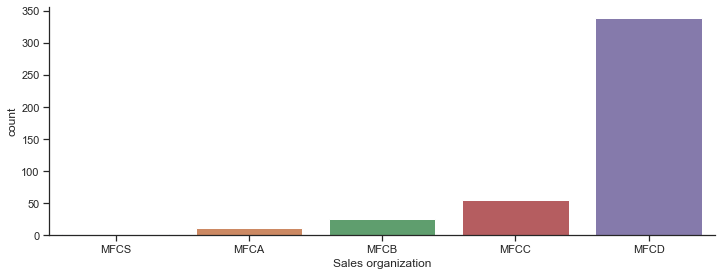

In [96]:
# Distribution based on Plant Sales Organization
f = sns.catplot(x="Sales organization",
                data=plant,kind="count",height=4, aspect=2.5);

In [92]:
plant.State.value_counts()

Rajasthan            52
Maharashtra          48
Tamil Nadu           47
Uttar Pradesh        46
Madhya Pradesh       35
Karnataka            31
Bihar                21
Haryana              20
Punjab               16
Andhra Pradesh       15
West Bengal          14
Odisha               13
Gujarat              13
Telangana            13
Jharkhand            12
Uttarakhand           9
Assam                 7
Kerala                6
Himachal Pradesh      5
Chhattisgarh          5
Puducherry            3
Jammu and Kashmir     2
Chandigarh            1
Manipur               1
Goa                   1
Delhi                 1
Nagaland              1
Name: State, dtype: int64

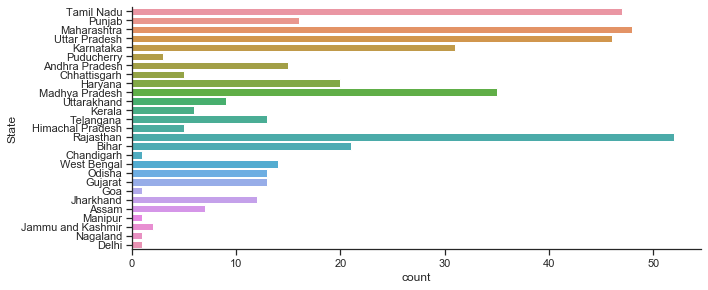

In [47]:
# Distribution based on Plant location
g = sns.catplot(y="State",
                data=plant,kind="count",height=4, aspect=2.5);

Maximum number of plants are located in Rajasthan

### Plant dataset is not very useful due to many null records, so wont be joining with main dataset.

## EDA ON CUSTOMER DATA

In [48]:
customer_full_data.head()

Business Partner Customer No.  Partner Type Data Origin  Title  \
0               31            1      1.000000        Z001    nan   
1               32            2      1.000000        Z005    nan   
2               34            4      1.000000        Z005    nan   
3               35            5      1.000000        Z005    nan   
4               42            7      1.000000        Z008    nan   

   Marital Status  Occupation Date of Birth Death date  
0             nan         nan           NaN        NaT  
1             nan         nan           NaN        NaT  
2        2.000000         nan           NaN        NaT  
3             nan         nan           NaN        NaT  
4             nan         nan           NaN        NaT

In [115]:
customer['Customer No.'].nunique()

555338

In [49]:
customer_full_data.shape

(555338, 9)

Since there are all unqiue Customer Number, so we dont need a aggregation function.

In [50]:
customer_full_data.isnull().sum()

Business Partner         0
Customer No.             0
Partner Type            78
Data Origin            136
Title                46307
Marital Status      539301
Occupation          540780
Date of Birth       541894
Death date          554675
dtype: int64

In [51]:
customer = customer_full_data.drop(columns = ['Marital Status', 'Occupation', 'Date of Birth', 'Death date', 'Business Partner'])

In [52]:
customer.isnull().sum()

Customer No.        0
Partner Type       78
Data Origin       136
Title           46307
dtype: int64

FIll Missing Values in Partner Type, Data Origin, Title columns with most_frequently used values.

In [53]:
most_frequent_value = customer['Partner Type'].mode()
customer['Partner Type'] = customer['Partner Type'].fillna(most_frequent_value[0])

In [54]:
customer['Data Origin'] = customer['Data Origin'].fillna(customer['Data Origin'].mode()[0])
customer['Title'] = customer['Title'].fillna(customer['Title'].mode()[0])

In [55]:
customer.isnull().sum()

Customer No.    0
Partner Type    0
Data Origin     0
Title           0
dtype: int64

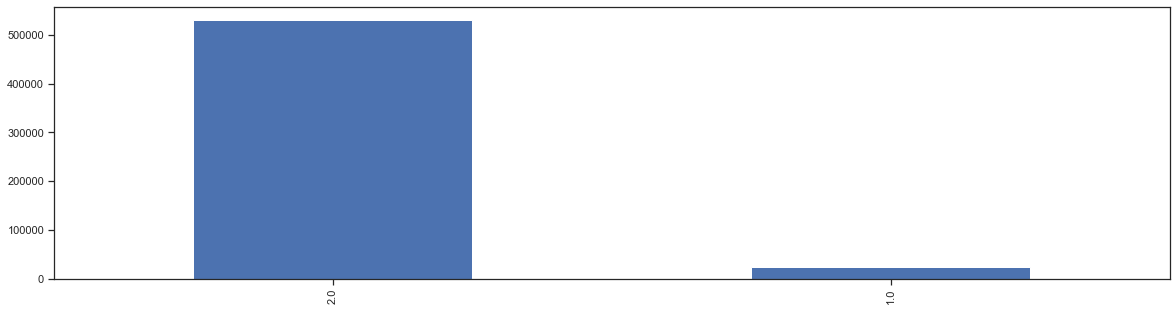

In [97]:
plt.figure(figsize=(20,5))
customer.Title.value_counts().head(50).plot.bar()
plt.show()

So maximum number of males are getting their car serviced from MFCS

In [99]:
customer['Partner Type'].value_counts()

1.000000       555045
2.000000           68
3.000000           62
9001.000000        57
9003.000000        56
4.000000           48
9002.000000         2
Name: Partner Type, dtype: int64

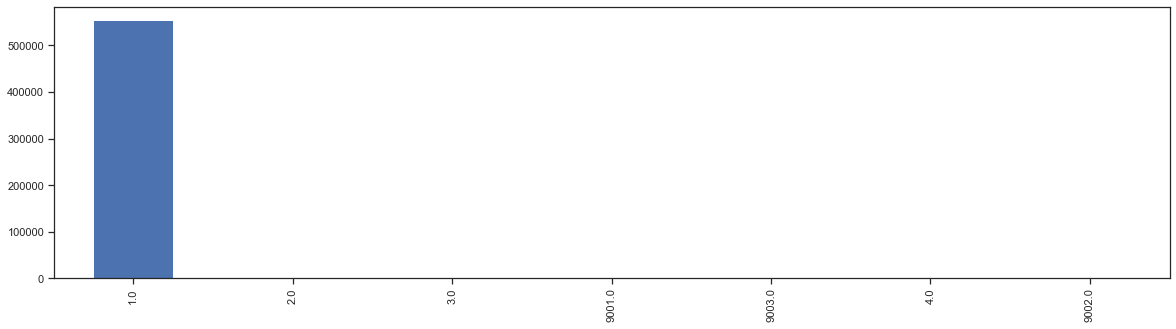

In [98]:
plt.figure(figsize=(20,5))
customer['Partner Type'].value_counts().head(50).plot.bar()
plt.show()

In [105]:
customer.columns

Index(['Customer No.', 'Partner Type', 'Data Origin', 'Title'], dtype='object')

Maximum number of customers are from Retail.

## EDA ON JTD


In [56]:
jtd.head()

Unnamed: 0  DBM Order  Order Item           Material Labor Value Number  \
0           0      22385         180        OSLCC_SRV31                NaN   
1           1      23910          10    1DM279018170117                NaN   
2           2      23910          40      1IS150203BE01                NaN   
3           3      23910          60    1DM279001990173                NaN   
4           4      23910          70  1DM88552790S001SA                NaN   

                               Description Item Category  Order Quantity  \
0  MACHINING RR.SUSPENSION CHARGE  (MAJOR)          P010        1.200000   
1           ASSY.OIL COOLER (6-PLATE) (VOR          P002        1.000000   
2           FRONT WHEEL BEARING/ LUBRICATE          P002        1.000000   
3          ASSY.CYL.HEAD W /O INJ.(NA W /O          P002        1.000000   
4           Engine Overhaul Kit -Indica Di          P002        1.000000   

  Target quantity UoM    Net value  
0                 MIN  1869.870000  
1                  EA  2151.130000  
2                  EA  2552.920000  
3                  EA 20360.140000  
4                  EA 10691.630000

In [57]:
jtd.shape

(5619484, 10)

In [58]:
jtd[jtd['DBM Order']==98050]

Unnamed: 0  DBM Order  Order Item      Material Labor Value Number  \
2674242     2674242      98050          10  1EMJ96615412                NaN   
2674243     2674243      98050          20  1EMJ96548238                NaN   
2674244     2674244      98050          30  1EMJ96548102                NaN   
2674245     2674245      98050          40  1EMJ96548239                NaN   
2674246     2674246      98050          50  1EMJ96548103                NaN   

                           Description Item Category  Order Quantity  \
2674242           SWITCH A-A/C CONTROL          P002        1.000000   
2674243   WEATHER STRIP A-REAR DOOR LH          P002        1.000000   
2674244  WEATHER STRIP A-FRONT DOOR LH          P002        1.000000   
2674245   WEATHER STRIP A-REAR DOOR RH          P002        1.000000   
2674246  WEATHER STRIP A-FRONT DOOR RH          P002        1.000000   

        Target quantity UoM   Net value  
2674242                  EA 5185.920000  
2674243                  EA 1433.490000  
2674244                  EA 1526.880000  
2674245                  EA 1433.490000  
2674246                  EA 1526.880000

In [106]:
jtd = jtd.drop(columns = ['Order Item','Material', 'Labor Value Number', 'Item Category', 'Target quantity UoM'])

In [107]:
jtd.head()

Unnamed: 0  DBM Order                              Description  \
0           0      22385  MACHINING RR.SUSPENSION CHARGE  (MAJOR)   
1           1      23910           ASSY.OIL COOLER (6-PLATE) (VOR   
2           2      23910           FRONT WHEEL BEARING/ LUBRICATE   
3           3      23910          ASSY.CYL.HEAD W /O INJ.(NA W /O   
4           4      23910           Engine Overhaul Kit -Indica Di   

   Order Quantity    Net value  
0        1.200000  1869.870000  
1        1.000000  2151.130000  
2        1.000000  2552.920000  
3        1.000000 20360.140000  
4        1.000000 10691.630000

In [109]:
aggregation_by_dbm = {'Description' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Order Quantity':'sum',
                              'Net value' : 'sum'}

jtd_final =jtd.groupby('DBM Order').agg(aggregation_by_dbm).reset_index()

In [110]:
jtd_final.head()

DBM Order                                        Description  \
0          4  KIT-ENGINE UPR REPAIRED SEAL, AFTER SEL, VALVE...   
1          5  REPLACE BRAKE PAD (BOTH SIDE), TUNE UP ENGINE,...   
2          6  MISC LABOR 0.5 HOURS, Paid Service-Minor, REPL...   
3          7                              MISC LABOR 0.25 HOURS   
4          8  DISTILLED WATER, WASHER 14MM, OIL FILTER, AIR ...   

   Order Quantity    Net value  
0      731.600000 16998.490000  
1      290.200000  3779.800000  
2      109.000000  1340.370000  
3       36.500000   167.360000  
4       69.000000  2306.940000

## Merging into the final dataset for model

In [170]:
#The final datasets to be merged are 'jtd_final', 'customer', 'invoice_final'

In [216]:
final = pd.merge(customer, invoice, on='Customer No.')

In [217]:
final.head()

Customer No.  Partner Type Data Origin    Title  Unnamed: 0 Cust Type  \
0     CS000018      1.000000        Z005 2.000000      787293    Retail   
1       E10007      1.000000        Z001 2.000000      693968    Retail   
2       E10013      1.000000        Z001 2.000000      725171    Retail   
3       E10013      1.000000        Z001 2.000000      725362    Retail   
4       E10014      1.000000        Z001 2.000000      684230    Retail   

         District  Job Card No  Labour Total                  Make  \
0      Tamil Nadu       350079      0.000000                 HONDA   
1  Andhra Pradesh        39254    509.970000  MAHINDRA &  MAHINDRA   
2  Andhra Pradesh        71672    804.260000         MARUTI SUZUKI   
3  Andhra Pradesh        71797      0.000000         MARUTI SUZUKI   
4  Andhra Pradesh        29109    554.900000         MARUTI SUZUKI   

           Model         Order Type  Total Amt Wtd Tax. Service_Time  \
0        MOBILIO         Mechanical           49.750000      19 days   
1  BOLERO PIK UP    Running Repairs         1083.770000       0 days   
2         WAGONR  SMC Value Package         1001.290000       0 days   
3         WAGONR     SMC Redemption            0.000000       0 days   
4         WAGONR       Paid Service          785.210000       1 days   

  ServiceTime_category  
0            Very slow  
1                 Fast  
2                 Fast  
3                 Fast  
4                  Mid

In [218]:
final = pd.merge(final,jtd_final, left_on='Job Card No', right_on='DBM Order',how='left')

In [219]:
final.head()

Customer No.  Partner Type Data Origin    Title  Unnamed: 0 Cust Type  \
0     CS000018      1.000000        Z005 2.000000      787293    Retail   
1       E10007      1.000000        Z001 2.000000      693968    Retail   
2       E10013      1.000000        Z001 2.000000      725171    Retail   
3       E10013      1.000000        Z001 2.000000      725362    Retail   
4       E10014      1.000000        Z001 2.000000      684230    Retail   

         District  Job Card No  Labour Total                  Make  \
0      Tamil Nadu       350079      0.000000                 HONDA   
1  Andhra Pradesh        39254    509.970000  MAHINDRA &  MAHINDRA   
2  Andhra Pradesh        71672    804.260000         MARUTI SUZUKI   
3  Andhra Pradesh        71797      0.000000         MARUTI SUZUKI   
4  Andhra Pradesh        29109    554.900000         MARUTI SUZUKI   

           Model         Order Type  Total Amt Wtd Tax. Service_Time  \
0        MOBILIO         Mechanical           49.750000      19 days   
1  BOLERO PIK UP    Running Repairs         1083.770000       0 days   
2         WAGONR  SMC Value Package         1001.290000       0 days   
3         WAGONR     SMC Redemption            0.000000       0 days   
4         WAGONR       Paid Service          785.210000       1 days   

  ServiceTime_category  DBM Order  \
0            Very slow     350079   
1                 Fast      39254   
2                 Fast      71672   
3                 Fast      71797   
4                  Mid      29109   

                                         Description  Order Quantity  \
0                                 MISC_OTHER CHARGES        1.000000   
1  BALL JOINT LOWER (122048060C), COTTER PIN 1 1/...      104.000000   
2  MISC_ON ROAD ASSISTANCE WITHOUT TOWING, Wheel ...      171.000000   
3                     Interior & Upholstery Cleaning        1.000000   
4  Wheel Alignment, Wheel Balancing (5 Wheels), B...       92.000000   

    Net value  
0   49.750000  
1 1083.770000  
2 1001.290000  
3    0.000000  
4  785.210000

In [220]:
final.describe()

Partner Type        Title    Unnamed: 0   Job Card No  Labour Total  \
count  19727.000000 19727.000000  19727.000000  19727.000000  19727.000000   
mean       1.109038     1.978912 581107.334567  91945.334618   1255.300597   
std        0.355463     0.143681 226763.814286 108583.112923   1933.382033   
min        1.000000     1.000000     20.000000      4.000000      0.000000   
25%        1.000000     2.000000 618017.500000  11034.500000    249.220000   
50%        1.000000     2.000000 662930.000000  36585.000000    799.200000   
75%        1.000000     2.000000 680103.000000 152750.500000   1499.285000   
max        3.000000     2.000000 984575.000000 499957.000000  53999.740000   

       Total Amt Wtd Tax.             Service_Time     DBM Order  \
count        19727.000000                    19727  19727.000000   
mean          4814.060572   3 days 04:30:13.960561  91945.334618   
std           8410.314456  13 days 09:15:45.172142 108583.112923   
min              0.000000          0 days 00:00:00      4.000000   
25%            870.715000          0 days 00:00:00  11034.500000   
50%           2564.840000          1 days 00:00:00  36585.000000   
75%           5574.410000          3 days 00:00:00 152750.500000   
max         238265.620000        589 days 00:00:00 499957.000000   

       Order Quantity     Net value  
count    19727.000000  19727.000000  
mean       225.062587   4842.342230  
std        958.715817   8545.333740  
min          0.000000      0.000000  
25%         10.100000    878.335000  
50%         61.080000   2579.960000  
75%        163.415000   5599.965000  
max      27844.000000 238265.620000